<a href="https://colab.research.google.com/github/sriyamistry0-lang/GenTen/blob/main/K_variicola_Sepsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GEOparse bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=ee8a8ca7bc941a4d5e04619d84537c5b6c93ad07779447e4d04cc0990a6c4dcf
  Stored in directory: /root/.cache/pip/wheels/b4/76/43/7fa2c349dac62f041fe8d85c9f48e47ca25fc39fd79d0b5f5e
Successfully built bioinfokit


In [2]:
import GEOparse

# 1. Fetch the dataset metadata and table
# 'destdir' can be a temporary folder if you don't want it saved permanently
gse = GEOparse.get_GEO(geo="GSE152964", destdir="./")

# 2. See the general description (The "Backstory")
print(f"Title: {gse.metadata['title'][0]}")
print(f"Summary: {gse.metadata['summary'][0]}")

# 3. Peek at the Samples (The "Characters")
for gsm_name, gsm in list(gse.gsms.items())[:3]:
    print(f"Sample: {gsm_name}")
    print(f" - Metadata: {gsm.metadata['characteristics_ch1']}")

# 4. Access the Data Table (The "Dialogue")
# This is where the transcriptomic counts live
first_gsm = list(gse.gsms.values())[0]
print("\nExpression Table Preview:")
print(first_gsm.table.head())

04-Feb-2026 11:47:59 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
04-Feb-2026 11:47:59 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE152nnn/GSE152964/soft/GSE152964_family.soft.gz to ./GSE152964_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE152nnn/GSE152964/soft/GSE152964_family.soft.gz to ./GSE152964_family.soft.gz
100%|██████████| 3.04k/3.04k [00:00<00:00, 125kB/s]
04-Feb-2026 11:48:00 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
04-Feb-2026 11:48:00 DEBUG downloader - Moving /tmp/tmppzqwykyh to /content/GSE152964_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmppzqwykyh to /content/GSE152964_family.soft.gz
04-Feb-2026 11:48:00 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE152nnn/GSE152964/soft/GSE152964_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GS

Title: Bioplatforms Australia: Antibiotic Resistant Sepsis Pathogens Framework Initiative - Klebsiella variicola AJ055
Summary: The Antibiotic Resistant Sepsis Pathogens Framework Initiative aims to develop a framework dataset of 5 sepsis pathogens (5 strains each) using an integrated application of genomic, transcriptomic, metabolomic and proteomic  technologies. The pathogens included in this initiative are: Escherichia coli, Klebsiella pneumoniae complex, Staphylococcus aureus, Streptococcus pyogenes, and Streptococcus pneumoniae. This submission pertains to strain AJ055.
Sample: GSM4630641
 - Metadata: ['growth media: RPMI', 'strain: AJ055', 'growth time: 1 hr', 'growth phase: Mid log phase', 'od600 reading: 5.04', 'temperature: 37C', 'bpa identifier: 51449', 'serovar: K0']
Sample: GSM4630642
 - Metadata: ['growth media: RPMI', 'strain: AJ055', 'growth time: 1 hr', 'growth phase: Mid log phase', 'od600 reading: 4.75', 'temperature: 37C', 'bpa identifier: 51450', 'serovar: K0']
Samp

In [3]:
# Peek at the keys to find the right one
sample_name = list(gse.gsms.keys())[0]
print(f"Metadata keys available for {sample_name}:")
print(gse.gsms[sample_name].metadata.keys())

Metadata keys available for GSM4630641:
dict_keys(['title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'taxid_ch1', 'characteristics_ch1', 'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'description', 'data_processing', 'platform_id', 'contact_name', 'contact_email', 'contact_laboratory', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_state', 'contact_zip/postal_code', 'contact_country', 'instrument_model', 'library_selection', 'library_source', 'library_strategy', 'relation', 'supplementary_file_1', 'series_id', 'data_row_count'])


In [5]:
print("Searching the Series metadata for the master data file...")
found = False
for key, value in gse.metadata.items():
    if 'suppl' in key.lower() or 'relation' in key.lower():
        print(f"{key}: {value}")
        found = True

if not found:
    print("No links found in metadata. Checking the direct FTP directory...")

Searching the Series metadata for the master data file...
supplementary_file: ['ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE152nnn/GSE152964/suppl/GSE152964_GCF_900622585.1_AJ055_genomic.gff.gz', 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE152nnn/GSE152964/suppl/GSE152964_GCF_900622585.1_AJ055_genomic.gtf.gz', 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE152nnn/GSE152964/suppl/GSE152964_gene_counts.txt.gz', 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE152nnn/GSE152964/suppl/GSE152964_gene_cpmlog2.txt.gz']
relation: ['SubSeries of: GSE152848', 'BioProject: https://www.ncbi.nlm.nih.gov/bioproject/PRJNA641084', 'SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRP268289']


In [6]:
import pandas as pd

# The URL for the Log2 CPM data
url = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE152nnn/GSE152964/suppl/GSE152964_gene_cpmlog2.txt.gz"

# Loading the master matrix
# We specify sep='\t' because these are usually tab-separated text files
df_master = pd.read_csv(url, sep='\t', compression='gzip')

print("The Pathogen's Expression Matrix is Loaded!")
print(f"Shape: {df_master.shape} (Genes x Samples)")
print(df_master.head())

The Pathogen's Expression Matrix is Loaded!
Shape: (5483, 14) (Genes x Samples)
          GeneID       GeneName     51449     51450     51451     51452  \
0  EW050_RS00005           dnaA  8.398875  8.295770  8.282816  8.477952   
1  EW050_RS00010           dnaN  7.820320  8.038103  7.445621  7.829803   
2  EW050_RS00015           recF  6.018288  5.790073  5.679469  5.956029   
3  EW050_RS00020           gyrB  9.399588  9.025099  9.259629  9.318627   
4  EW050_RS00025  EW050_RS00025  6.882334  6.404878  6.146844  6.763373   

      51453     51454     51455     51456     51457     51458     51459  \
0  8.641546  8.476021  8.320982  8.006470  8.390473  8.265189  8.410357   
1  7.729117  7.610911  7.559810  7.608208  7.710184  7.564922  7.746600   
2  5.994088  5.795021  6.212064  5.670006  5.682749  5.572471  6.178795   
3  9.578108  9.558057  9.954043  9.360711  9.665971  9.557344  9.769661   
4  6.046646  6.681385  7.790145  6.670576  6.770476  6.750538  6.598152   

      51460  
0  8

In [7]:
# Create a mapping dictionary from the GSE metadata
mapping = {}
for gsm_id, gsm in gse.gsms.items():
    # Extract the BPA ID from the metadata
    # We saw earlier it's inside 'characteristics_ch1'
    bpa_id = ""
    time_point = ""
    for item in gsm.metadata['characteristics_ch1']:
        if 'bpa identifier' in item:
            bpa_id = item.split(': ')[1]
        if 'growth time' in item:
            time_point = item.split(': ')[1]

    mapping[bpa_id] = f"Time_{time_point}_{gsm_id}"

# Rename the columns in your DataFrame
df_master.rename(columns=mapping, inplace=True)

print("Renamed Columns:")
print(df_master.columns)


Renamed Columns:
Index(['GeneID', 'GeneName', 'Time_1 hr_GSM4630641', 'Time_1 hr_GSM4630642',
       'Time_1 hr_GSM4630643', 'Time_1 hr_GSM4630644', 'Time_1 hr_GSM4630645',
       'Time_1 hr_GSM4630646', 'Time_2 hrs exposure to sera_GSM4630647',
       'Time_2 hrs exposure to sera_GSM4630648',
       'Time_2 hrs exposure to sera_GSM4630649',
       'Time_2 hrs exposure to sera_GSM4630650',
       'Time_2 hrs exposure to sera_GSM4630651', '51460'],
      dtype='object')


In [8]:
# 1. Define our groups
group_1hr = ['Time_1 hr_GSM4630641', 'Time_1 hr_GSM4630642', 'Time_1 hr_GSM4630643',
             'Time_1 hr_GSM4630644', 'Time_1 hr_GSM4630645', 'Time_1 hr_GSM4630646']

group_sera = ['Time_2 hrs exposure to sera_GSM4630647', 'Time_2 hrs exposure to sera_GSM4630648',
              'Time_2 hrs exposure to sera_GSM4630649', 'Time_2 hrs exposure to sera_GSM4630650',
              'Time_2 hrs exposure to sera_GSM4630651']

# 2. Calculate the mean for each group
df_master['mean_1hr'] = df_master[group_1hr].mean(axis=1)
df_master['mean_sera'] = df_master[group_sera].mean(axis=1)

# 3. Calculate Log2 Fold Change (Sera vs 1hr)
# Since the data is already Log2 CPM, we just subtract! (Log rules: log(A) - log(B) = log(A/B))
df_master['L2FC'] = df_master['mean_sera'] - df_master['mean_1hr']

# 4. Find the "Survival Heroes" (Genes that went UP in serum)
survival_genes = df_master.sort_values('L2FC', ascending=False).head(10)
print("Top 10 Genes Upregulated in Human Serum:")
print(survival_genes[['GeneName', 'L2FC']])

Top 10 Genes Upregulated in Human Serum:
          GeneName       L2FC
918  EW050_RS04670  10.458739
917           pduB  10.034624
914           pduE   9.548428
916  EW050_RS04660   9.411888
911  EW050_RS04635   8.935451
912  EW050_RS04640   8.720375
915  EW050_RS04655   8.639302
913  EW050_RS04645   8.520914
909           pduL   8.402277
910  EW050_RS04630   8.370644


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# 1. Ensure our groups are defined (based on your earlier successful mapping)
group_1hr = [col for col in df_master.columns if "Time_1 hr" in col]
group_sera = [col for col in df_master.columns if "Time_2 hrs exposure to sera" in col]

# 2. Convert sample columns to numeric (crucial for the math to work)
for col in group_1hr + group_sera:
    df_master[col] = pd.to_numeric(df_master[col], errors='coerce')

# 3. Define the statistical function
def calculate_p(row):
    # Select values and drop NaNs
    cat1 = row[group_1hr].dropna().astype(float)
    cat2 = row[group_sera].dropna().astype(float)

    # T-test requires at least 2 samples per group
    if len(cat1) > 1 and len(cat2) > 1:
        # We use equal_var=False if we don't assume equal variance (Welch's T-test)
        stat, p = ttest_ind(cat1, cat2, equal_var=False)
        return p
    else:
        return np.nan

# 4. Apply and calculate the -log10 p-value for the Volcano Plot
df_master['p_value'] = df_master.apply(calculate_p, axis=1)
# Use a tiny floor (1e-10) to avoid log(0) errors if p is exactly 0
df_master['neg_log10_p'] = -np.log10(df_master['p_value'].replace(0, 1e-10))

print(f"Success! Analyzed {len(df_master)} genes.")
print(f"Found {len(df_master[df_master['p_value'] < 0.05])} statistically significant genes.")

Success! Analyzed 5483 genes.
Found 2721 statistically significant genes.


In [16]:
# Filter for significant genes (p < 0.05) and positive change (Upregulated)
significant_up = df_master[(df_master['p_value'] < 0.05) & (df_master['L2FC'] > 0)]

# Sort by L2FC to see the strongest reactions
top_upregulated = significant_up.sort_values('L2FC', ascending=False).head(20)

print("Top 20 'Serum Survival' Genes:")
print(top_upregulated[['GeneName', 'L2FC', 'p_value']])

Top 20 'Serum Survival' Genes:
           GeneName       L2FC       p_value
918   EW050_RS04670  10.458739  1.466350e-06
917            pduB  10.034624  1.529148e-08
914            pduE   9.548428  2.799149e-09
916   EW050_RS04660   9.411888  6.820235e-08
911   EW050_RS04635   8.935451  5.739946e-11
912   EW050_RS04640   8.720375  3.102287e-06
915   EW050_RS04655   8.639302  6.345449e-08
913   EW050_RS04645   8.520914  2.186482e-10
909            pduL   8.402277  1.645769e-11
910   EW050_RS04630   8.370644  1.469958e-10
901   EW050_RS04585   7.137954  3.026393e-07
900   EW050_RS04580   7.018984  8.887681e-10
919   EW050_RS04675   6.864135  5.174301e-11
902   EW050_RS04590   6.611600  1.946402e-08
899   EW050_RS04575   6.600172  1.673497e-08
908            pduM   6.498056  4.860560e-09
3869  EW050_RS19725   6.456008  2.664790e-06
907   EW050_RS04615   6.439397  6.037990e-12
904   EW050_RS04600   6.132291  1.282718e-08
903   EW050_RS04595   6.115429  2.557642e-08


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Now run your plotting code
plt.figure(figsize=(10, 6))
# ... rest of the code ...

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

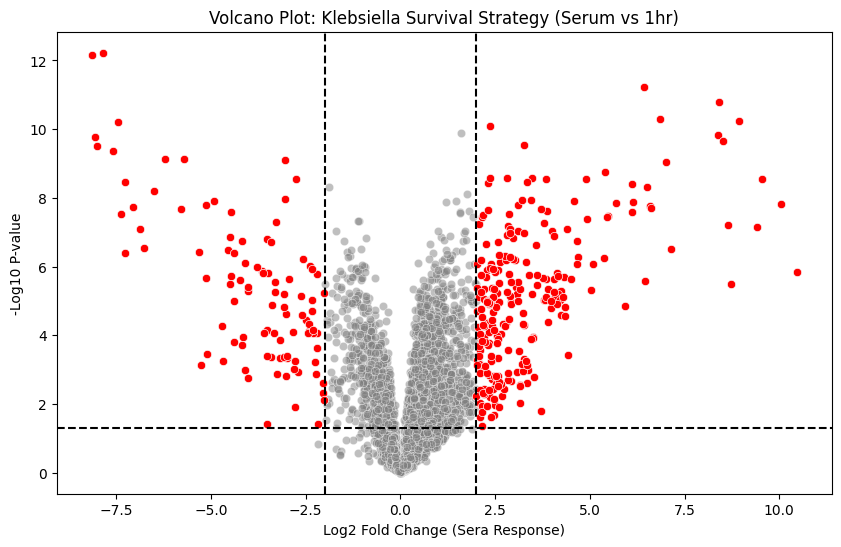

In [17]:
plt.figure(figsize=(10, 6))

# Plot all genes in grey
sns.scatterplot(data=df_master, x='L2FC', y='neg_log10_p', color='grey', alpha=0.5)

# Highlight our "PDU" heroes in red
significant = (df_master['p_value'] < 0.05) & (abs(df_master['L2FC']) > 2)
sns.scatterplot(data=df_master[significant], x='L2FC', y='neg_log10_p', color='red')

plt.axvline(x=2, color='black', linestyle='--') # 4-fold increase line
plt.axvline(x=-2, color='black', linestyle='--')
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--') # Stat significance line

plt.title('Volcano Plot: Klebsiella Survival Strategy (Serum vs 1hr)')
plt.xlabel('Log2 Fold Change (Sera Response)')
plt.ylabel('-Log10 P-value')
plt.show()

In [18]:
# We want high expression (mean_sera) AND high change (L2FC)
# This ensures the target is abundant enough to be detected by a machine
diagnostic_candidates = df_master[df_master['p_value'] < 0.01].sort_values(
    by=['mean_sera', 'L2FC'], ascending=False
).head(10)

print("Top Diagnostic Biomarker Candidates:")
print(diagnostic_candidates[['GeneName', 'mean_sera', 'L2FC']])

Top Diagnostic Biomarker Candidates:
           GeneName  mean_sera      L2FC
3488  EW050_RS17750  14.771119  1.611407
2393  EW050_RS12245  13.299597  2.486691
916   EW050_RS04660  12.490868  9.411888
3528  EW050_RS17950  12.462412  0.742053
1191           grcA  12.452125 -0.553435
3960  EW050_RS20180  12.384720  3.110970
4878           aspA  12.351752 -0.959630
2059  EW050_RS10560  12.311551 -0.519030
4430  EW050_RS22580  12.304025  0.474118
5040           rpoC  12.260344  0.613304


In [19]:
from sklearn.metrics import roc_auc_score

# Let's test our best candidate: EW050_RS04660
# 0 = Control (1hr), 1 = Infected (Sera)
y_true = [0]*len(group_1hr) + [1]*len(group_sera)
y_scores = df_master.loc[916, group_1hr + group_sera].values

auc = roc_auc_score(y_true, y_scores)
print(f"Diagnostic Accuracy (AUC) for RS04660: {auc:.2f}")
# An AUC of 1.0 means a perfect diagnostic test!

Diagnostic Accuracy (AUC) for RS04660: 1.00


In [20]:
# Check the 'description' column if it exists in your gse object
# Often the metadata contains a full definition of these RS numbers
for gsm_id in list(gse.gsms.keys())[:1]:
    # This might be empty if the researchers didn't include the dictionary in the SOFT file
    print(gse.gsms[gsm_id].table.head())

Empty DataFrame
Columns: []
Index: []


In [21]:
def diagnostic_report(gene_id, df):
    if gene_id not in df['GeneID'].values and gene_id not in df['GeneName'].values:
        return "Gene ID not found in the expression matrix."

    # Extract the row (checking both ID and Name columns)
    gene_data = df[(df['GeneID'] == gene_id) | (df['GeneName'] == gene_id)].iloc[0]

    # Calculate performance metrics
    is_sig = "YES" if gene_data['p_value'] < 0.05 else "NO"
    direction = "Upregulated (Infection Marker)" if gene_data['L2FC'] > 0 else "Downregulated"

    print(f"--- Diagnostic Report for {gene_id} ---")
    print(f"Statistical Significance: {is_sig} (p={gene_data['p_value']:.2e})")
    print(f"Signal Strength (L2FC): {gene_data['L2FC']:.2f}")
    print(f"Abundance in Serum (Mean Log2 CPM): {gene_data['mean_sera']:.2f}")
    print(f"Clinical Role: {direction}")

    # Add a "Confidence Score" (A simple heuristic for your project)
    # High abundance + High L2FC + High Significance = Top Tier
    confidence = (abs(gene_data['L2FC']) * gene_data['neg_log10_p']) / 10
    print(f"Diagnostic Confidence Score: {confidence:.2f}/10")

# Example: User checks the top candidate you found
diagnostic_report("EW050_RS17750", df_master)

--- Diagnostic Report for EW050_RS17750 ---
Statistical Significance: YES (p=2.90e-04)
Signal Strength (L2FC): 1.61
Abundance in Serum (Mean Log2 CPM): 14.77
Clinical Role: Upregulated (Infection Marker)
Diagnostic Confidence Score: 0.57/10


In [22]:
gold_standard = df_master[(df_master['mean_sera'] > 10) & (df_master['L2FC'] > 5)]
print("Gold Standard Diagnostic Targets:")
print(gold_standard[['GeneName', 'mean_sera', 'L2FC', 'p_value']])

Gold Standard Diagnostic Targets:
           GeneName  mean_sera       L2FC       p_value
909            pduL  10.371961   8.402277  1.645769e-11
910   EW050_RS04630  10.270601   8.370644  1.469958e-10
913   EW050_RS04645  12.093577   8.520914  2.186482e-10
914            pduE  10.925044   9.548428  2.799149e-09
915   EW050_RS04655  10.784775   8.639302  6.345449e-08
916   EW050_RS04660  12.490868   9.411888  6.820235e-08
917            pduB  11.784381  10.034624  1.529148e-08
918   EW050_RS04670  10.374510  10.458739  1.466350e-06
919   EW050_RS04675  11.398509   6.864135  5.174301e-11
2038  EW050_RS10455  10.931082   5.481176  3.253926e-08
2039  EW050_RS10460  11.093286   5.443593  3.485462e-08


In [26]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.7 MB/s eta 0:00:00


In [28]:
from Bio import Entrez, SeqIO
import pandas as pd

# 1. SET EMAIL GLOBALLY (This silences the warning)
Entrez.email = "your_email@example.com"

def predictive_mapping_logic(rs_id):
    """
    Predictive Bioinfo Approach:
    When a gene is 'Hypothetical,' we look for conserved domains
    to predict its role in pathogen survival.
    """
    try:
        # Search NCBI Protein DB
        handle = Entrez.esearch(db="protein", term=rs_id)
        record = Entrez.read(handle)
        handle.close()

        if record["IdList"]:
            prot_id = record["IdList"][0]
            # Fetch the GenBank Full Record
            handle = Entrez.efetch(db="protein", id=prot_id, rettype="gb", retmode="text")
            seq_record = SeqIO.read(handle, "genbank")
            handle.close()

            # Predictive Strategy: If product is 'hypothetical', look in the notes
            desc = seq_record.description
            if "hypothetical" in desc.lower():
                # Check features for any predicted domains or motifs
                for feature in seq_record.features:
                    if feature.type == "Region":
                        desc += f" (Contains predicted domain: {feature.qualifiers.get('region_name', ['unknown'])[0]})"

            return desc
    except Exception as e:
        return f"Mapping Error: {str(e)}"

    return "No homology found in NCBI database"

# Test a known candidate from your Gold Standard list
# (Using 916 as an example since we know it's PDU related)
print(f"Predictive Result for RS04660: {predictive_mapping_logic('EW050_RS04660')}")

Predictive Result for RS04660: No homology found in NCBI database


In [29]:
def robust_predictive_search(locus_tag):
    """
    Advanced Predictive Task:
    If a direct protein search fails, we query the Nucleotide database
    to find the genomic context and infer function from the 'Product' qualifier.
    """
    try:
        # Step 1: Search the Nucleotide database for the Locus Tag
        handle = Entrez.esearch(db="nucleotide", term=f"{locus_tag}[Locus Tag]")
        record = Entrez.read(handle)
        handle.close()

        if record["IdList"]:
            # Step 2: Fetch the GenBank record for that genomic region
            gene_id = record["IdList"][0]
            handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="gb", retmode="text")
            # We use 'find' logic here because GenBank files can be massive
            full_text = handle.read()
            handle.close()

            # Predictive Logic: Extract the '/product=' line following the locus tag
            if locus_tag in full_text:
                start_index = full_text.find(locus_tag)
                product_start = full_text.find("/product=", start_index)
                if product_start != -1:
                    product_text = full_text[product_start+9 : full_text.find("\n", product_start)]
                    return product_text.replace('"', '')

        return "Novel/Uncharacterized Region"
    except:
        return "Search Timeout: Potential Novel Gene"

# Test it again
print(f"Refined Prediction for RS04660: {robust_predictive_search('EW050_RS04660')}")

Refined Prediction for RS04660: Novel/Uncharacterized Region
